In [24]:
# dependencies
# import json
# import folium
# import urllib.request

import glob
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import friedmanchisquare

sns.set_theme(style="darkgrid")


In [25]:
# path to folder
folder_path = './data/'
file_paths  = glob.glob(folder_path + '*.csv')

# list to hold dataframes and a counter for id reassignment
dfs    = []
id_cnt = 1

# read each file into a dataframe
for file_path in file_paths:
    df = pd.read_csv(file_path)

    # drop the first row
    df = df.iloc[1:]

    # move Image_vividness value from the last row to the column of it
    if 'Image_vividness' in df.columns and not pd.isna(df.loc[df.index[-1], 'Image_vividness']):
        image_vividness_value = df.loc[df.index[-1], 'Image_vividness']
        df['Image_vividness'] = image_vividness_value

    # then drop the last row that contains Image_vividness
    df = df.iloc[:-1]

    # assign a new participant_id
    df['participant_id'] = id_cnt
    id_cnt += 1

    dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)


In [26]:
# drop columns that only contain NaN values
df_combined = df_combined.dropna(axis=1, how='all')

# drop session and expName columns
df_combined = df_combined.drop(columns=['session', 'expName'])

# convert the gender values to lower case
df_combined['gender'] = df_combined['gender'].str.lower()

In [27]:
df_combined.to_csv('df_combined.csv', index=False)

In [28]:
# drop outliners in response time
df_no_outliner = df_combined[df_combined['response_time'] <= 4]

In [29]:
df_no_outliner.to_csv('df_no_outliner.csv', index=False)

**distribution plot for gender**

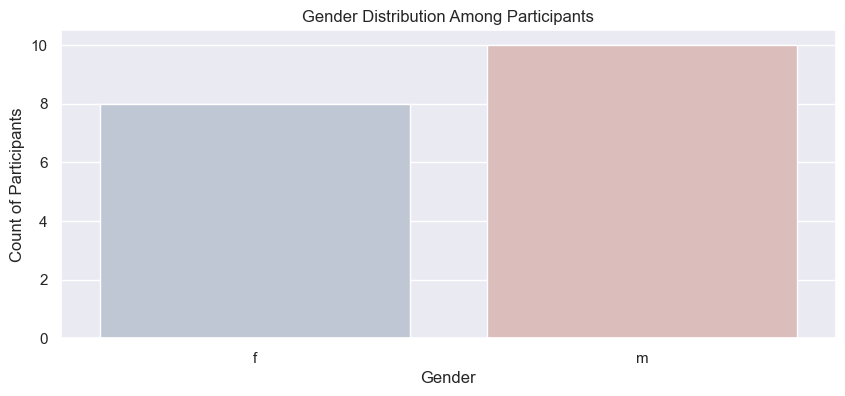

In [30]:
# group by gender and count participants
gender_dist = df_no_outliner.groupby('gender')['participant_id'].nunique()
gender_dist = gender_dist.reset_index()

# plotting
fig = plt.figure(figsize=(10, 4))
sns.barplot(gender_dist, x='gender', y='participant_id',
            hue='gender', palette='vlag')
plt.title('Gender Distribution Among Participants')
plt.xlabel('Gender')
plt.ylabel('Count of Participants')
plt.show()

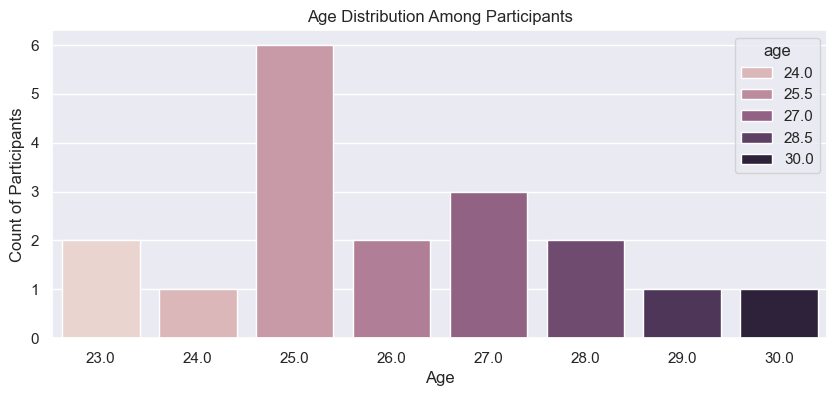

In [31]:
# group by age and count participants
age_dist = df_no_outliner.groupby('age')['participant_id'].nunique()
age_dist = age_dist.reset_index()

# plotting
fig = plt.figure(figsize=(10, 4))
sns.barplot(age_dist, x='age', y='participant_id',
            hue='age')
plt.title('Age Distribution Among Participants')
plt.xlabel('Age')
plt.ylabel('Count of Participants')
plt.show()

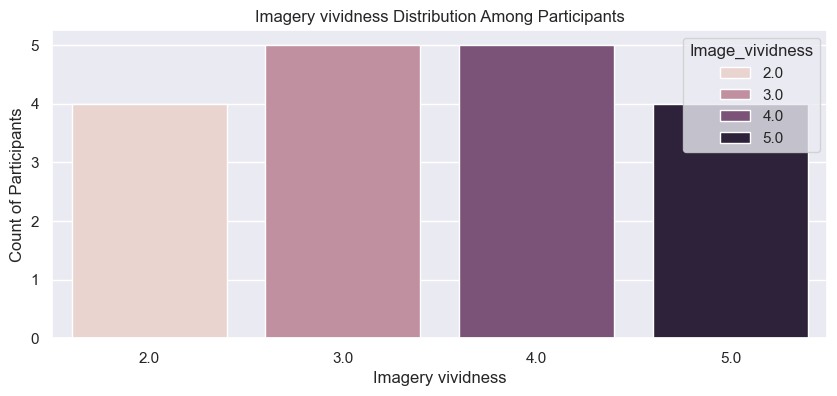

In [32]:
# group by vividness and count participants
vividness_dist = df_no_outliner.groupby('Image_vividness')['participant_id'].nunique()
vividness_dist = vividness_dist.reset_index()

# plotting
fig = plt.figure(figsize=(10, 4))
sns.barplot(vividness_dist, x='Image_vividness', y='participant_id',
            hue='Image_vividness')
plt.title('Imagery vividness Distribution Among Participants')
plt.xlabel('Imagery vividness')
plt.ylabel('Count of Participants')
plt.show()

In [33]:
# Calculate mean and standard deviation for age
age_mean = df_no_outliner['age'].mean()
age_std  = df_no_outliner['age'].std()

# Calculate mean and standard deviation for Image_vividness
vividness_mean = df_no_outliner['Image_vividness'].mean()
vividness_std  = df_no_outliner['Image_vividness'].std()

# Printing the results
print(f"Age - Mean: {age_mean}, Standard Deviation: {age_std}")
print(f"Image Vividness - Mean: {vividness_mean}, Standard Deviation: {vividness_std}")

Age - Mean: 25.960155490767736, Standard Deviation: 1.8732621973033605
Image Vividness - Mean: 3.50242954324587, Standard Deviation: 1.0764746135061625


**distribution plot for response times**

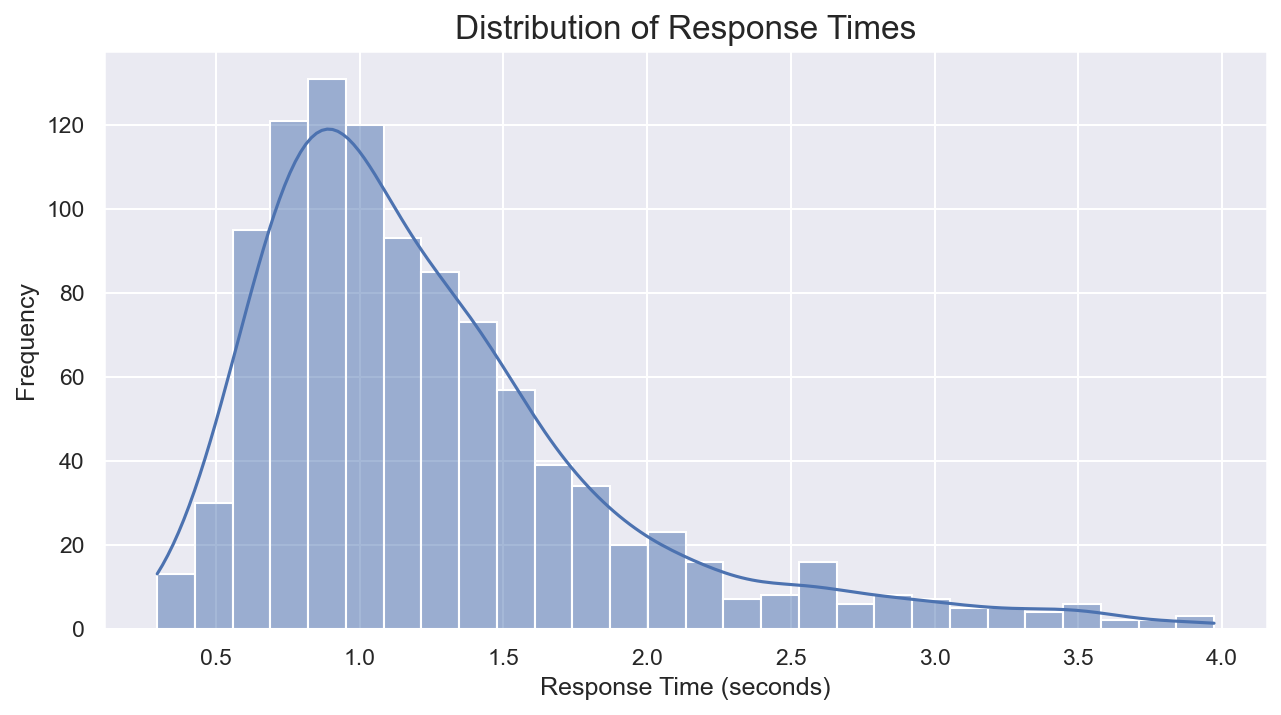

In [34]:
plt.figure(figsize=(10, 5), dpi=150)
sns.histplot(df_no_outliner['response_time'], kde=True)
plt.title('Distribution of Response Times', fontsize=16)
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Calculate mean and standard deviation for response time
rt_mean = df_no_outliner['response_time'].mean()
rt_std  = df_no_outliner['response_time'].std()

# Printing the results
print(f"Response time - Mean: {rt_mean}, Standard Deviation: {rt_std}")

Response time - Mean: 1.255269771175091, Standard Deviation: 0.6374263221837615


**boxplot to compare response times for different cue types**

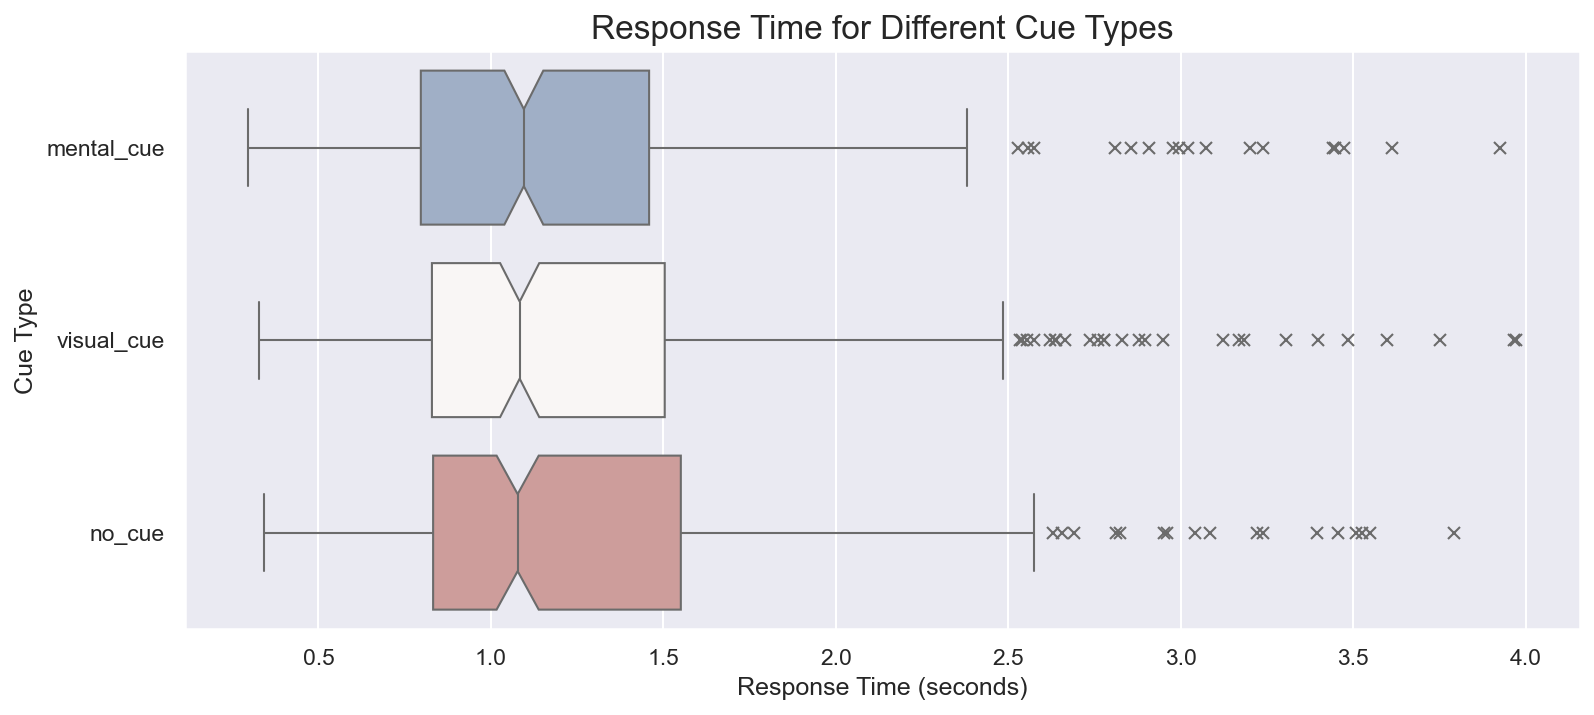

In [36]:
plt.figure(figsize=(12, 5), dpi=150)
sns.boxplot(df_no_outliner, x='response_time', y='cue_type', 
            hue='cue_type', orient='horizontal',
            flierprops={"marker": "x"},
            notch=True, saturation=.8,
            palette='vlag')
plt.title('Response Time for Different Cue Types', 
          fontsize=16)
plt.xlabel('Response Time (seconds)')
plt.ylabel('Cue Type')

plt.show()

**Categorical scatterplots to compare response times for different cue types**

<Figure size 3000x1500 with 0 Axes>

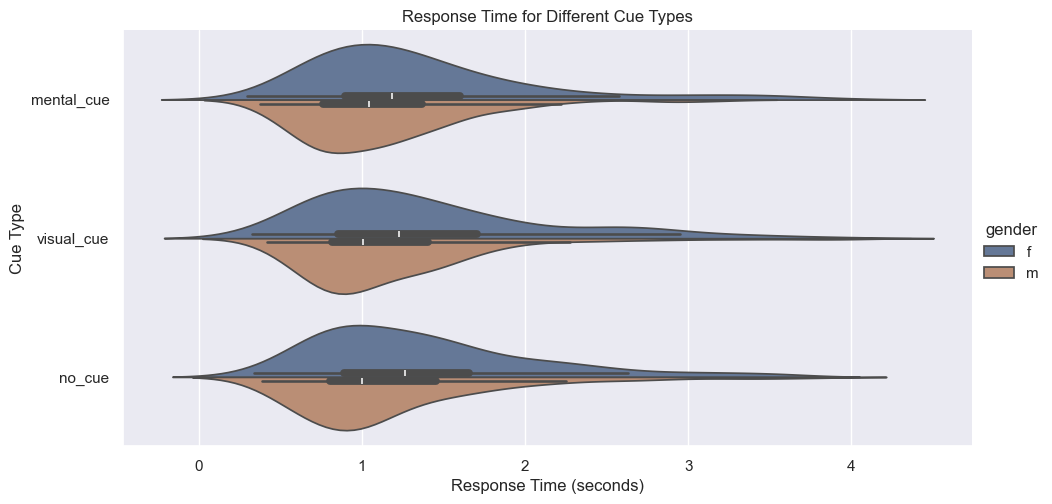

In [37]:
plt.figure(figsize=(20, 10), dpi=150)
sns.catplot(df_no_outliner, x='response_time', y='cue_type', 
            hue='gender',kind="violin", 
            split=True, saturation=.5,
            height=5, aspect=2)
plt.title('Response Time for Different Cue Types')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Cue Type')

plt.show()

<Figure size 3000x1500 with 0 Axes>

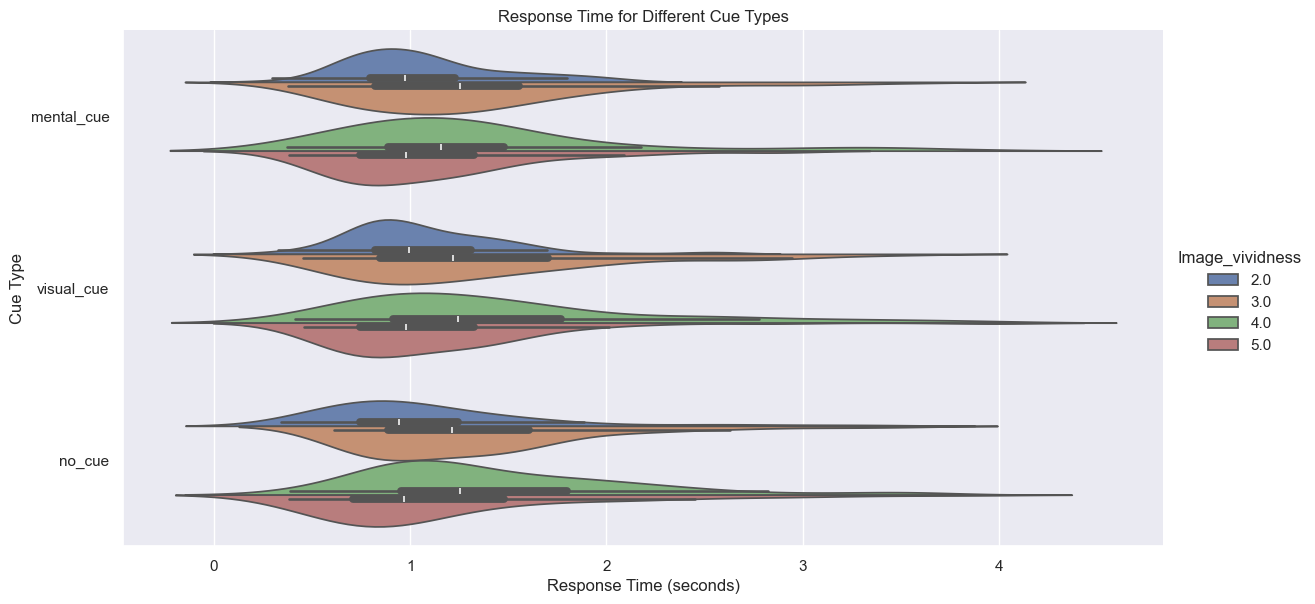

In [38]:
plt.figure(figsize=(20, 10), dpi=150)
sns.catplot(df_no_outliner, x='response_time', y='cue_type', 
            hue='Image_vividness', kind="violin", 
            split=True, saturation=.5,
            height=6, aspect=2, palette="muted")
plt.title('Response Time for Different Cue Types')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Cue Type')

plt.show()

**The first 30 trails only**

In [39]:
# keep only 30 trials for each participant
df_head30 = df_no_outliner.groupby('participant_id').head(30)
df_tail30 = df_no_outliner.groupby('participant_id').tail(30)


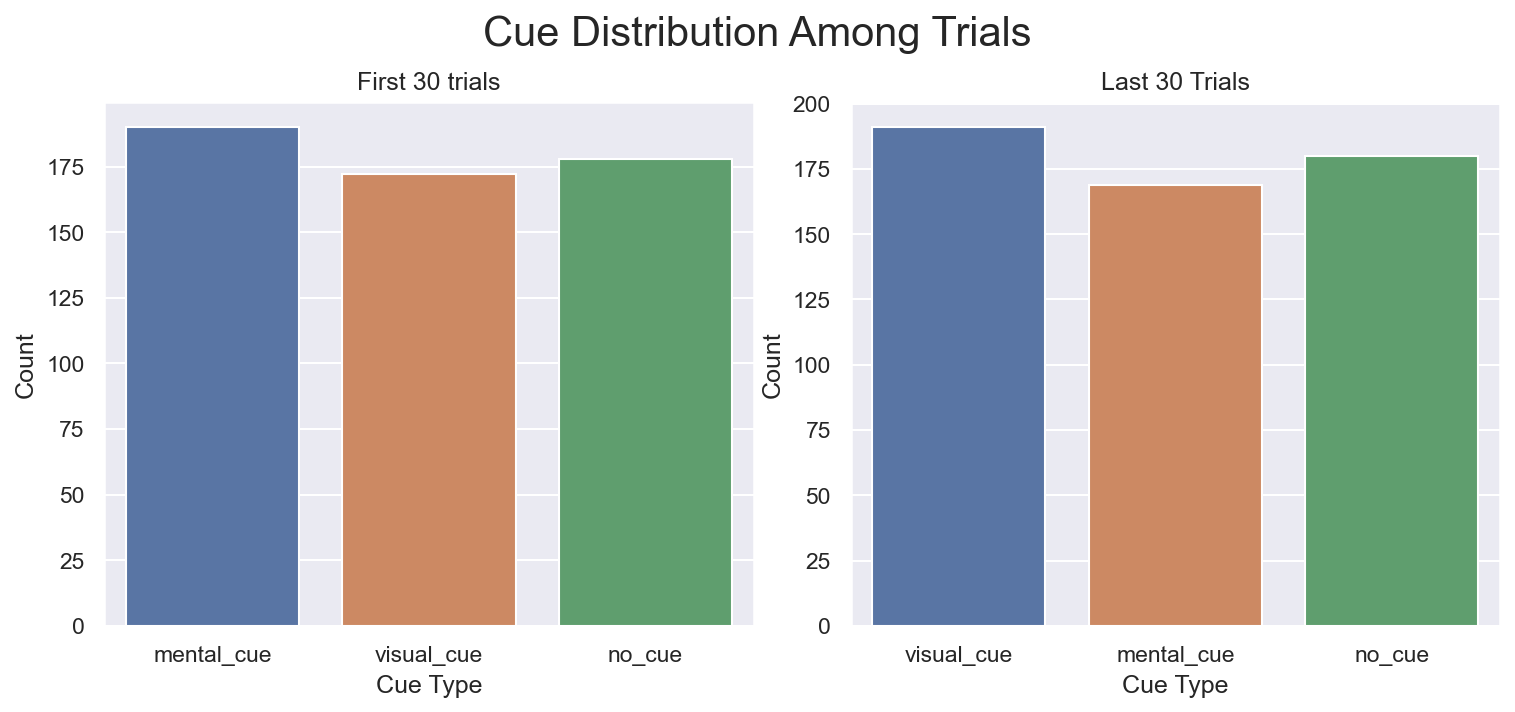

In [40]:
# plotting
fig = plt.figure(figsize=(10, 5), dpi=150)
fig.subplots_adjust(hspace=.5)

for idx, df in enumerate([df_head30, df_tail30]):
    ax = plt.subplot(1, 2, idx + 1)

    sns.countplot(df, x='cue_type', hue='cue_type')
    ax.set_xlabel('Cue Type')
    ax.set_ylabel('Count')
    plt.title("First 30 trials" if idx==0 else "Last 30 Trials")


fig.suptitle('Cue Distribution Among Trials',
                x=.5, y=.95, fontsize=20)
fig.tight_layout(pad=.3, rect=[0, .03, 1, .945])
plt.show()

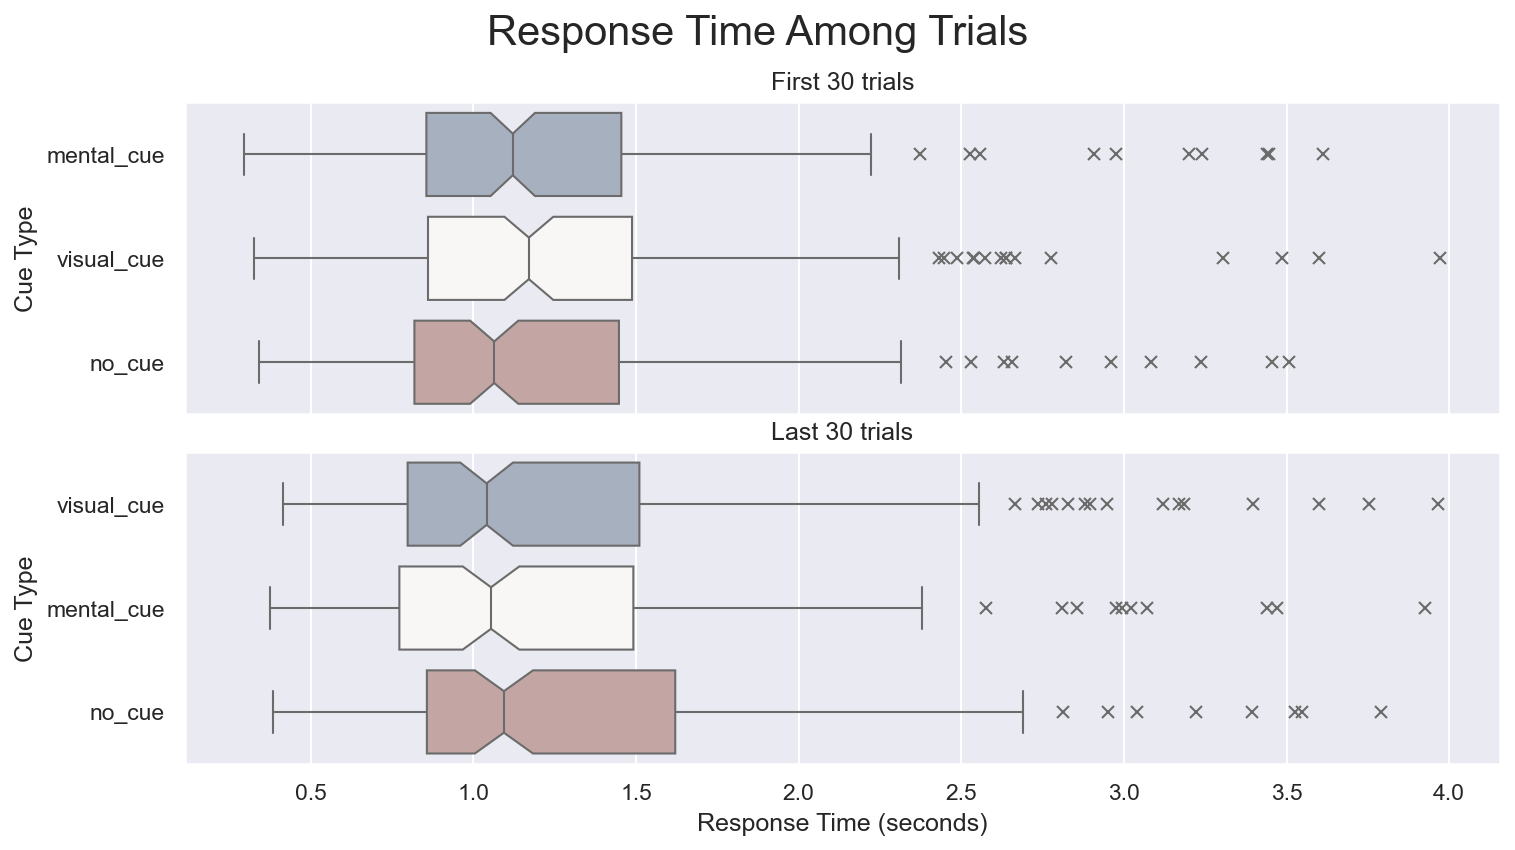

In [41]:
# plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 6), dpi=150,
                        sharex=True)
fig.subplots_adjust(hspace=.5)


titles = ['First 30 trials', 'Last 30 trials']
for idx, (df, title) in enumerate(zip([df_head30, df_tail30], titles)):
    ax = plt.subplot(2, 1, idx + 1)

    sns.boxplot(df, x='response_time', y='cue_type', 
                hue='cue_type', orient='horizontal',
                flierprops={"marker": "x"},
                notch=True, saturation=.5,
                palette='vlag')
    axs[idx].set_ylabel('Cue Type')
    axs[idx].set_title(title)

# set the xlabel for the lower subplot
axs[1].set_xlabel('Response Time (seconds)')

fig.suptitle('Response Time Among Trials',
                x=.5, y=.95, fontsize=20)
plt.xlabel('Response Time (seconds)')
fig.tight_layout(pad=.3, rect=[0, .03, 1, .945])
plt.show()

## Mean of response time for all participants under different cues

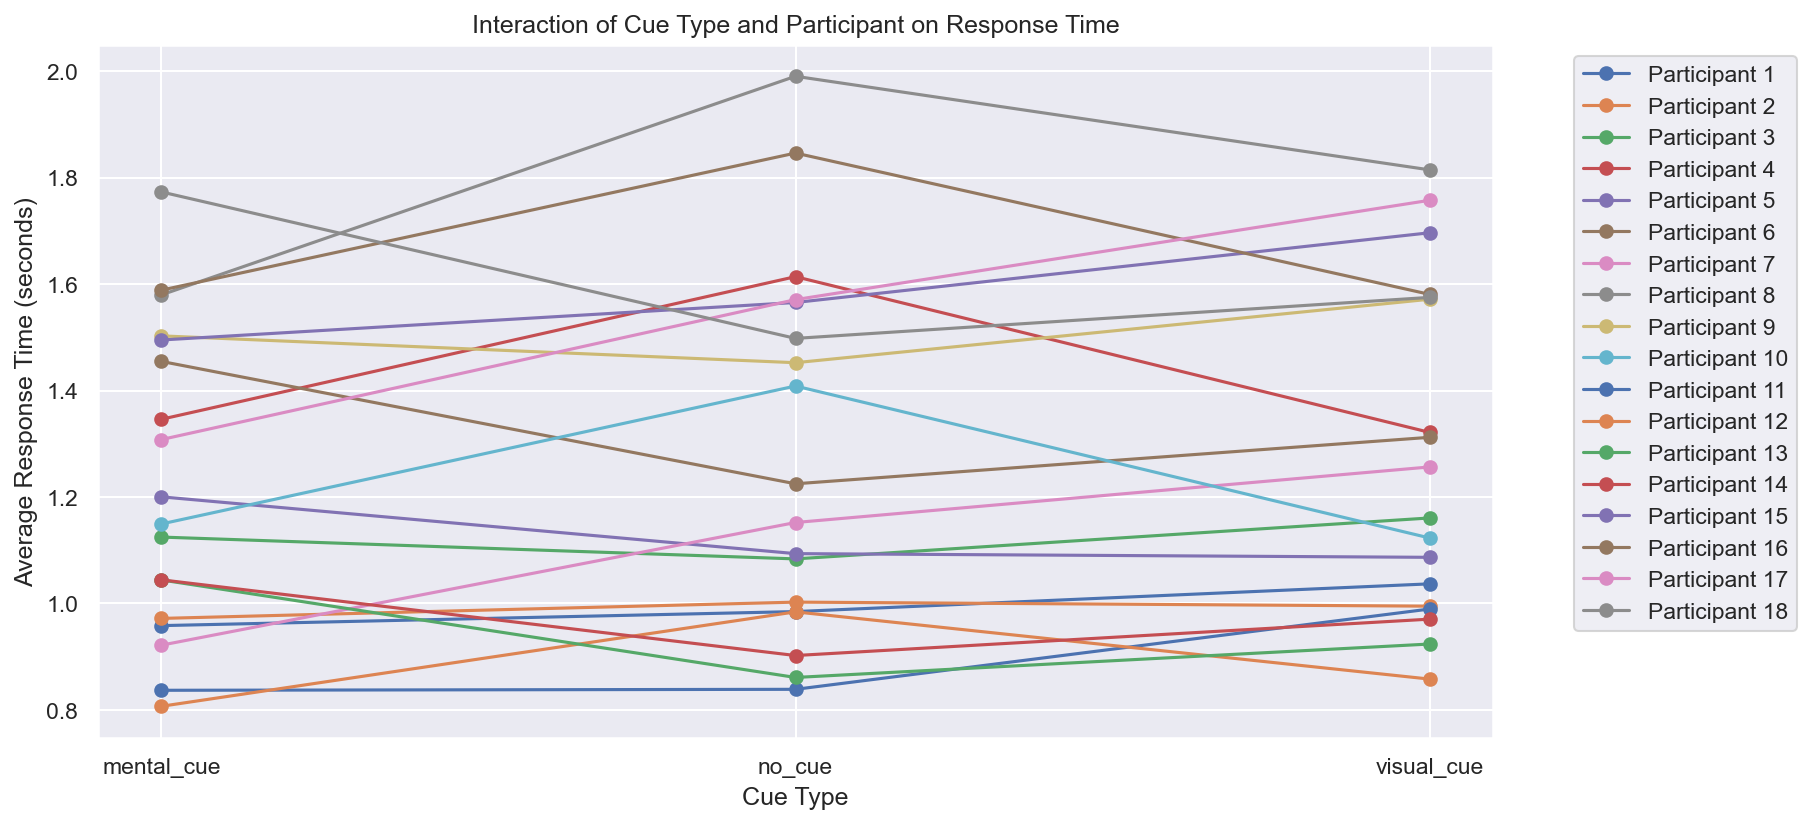

In [42]:
# calculate the means
mean_rt = df_no_outliner.groupby(['participant_id', 'cue_type'])['response_time'].mean().reset_index()

# plotting
plt.figure(figsize=(12, 6), dpi=150)
for participant_id in mean_rt['participant_id'].unique():
    subset = mean_rt[mean_rt['participant_id'] == participant_id]
    plt.plot(subset['cue_type'], subset['response_time'], 
             marker='o', label=f'Participant {participant_id}')

plt.xlabel('Cue Type')
plt.ylabel('Average Response Time (seconds)')
plt.title('Interaction of Cue Type and Participant on Response Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


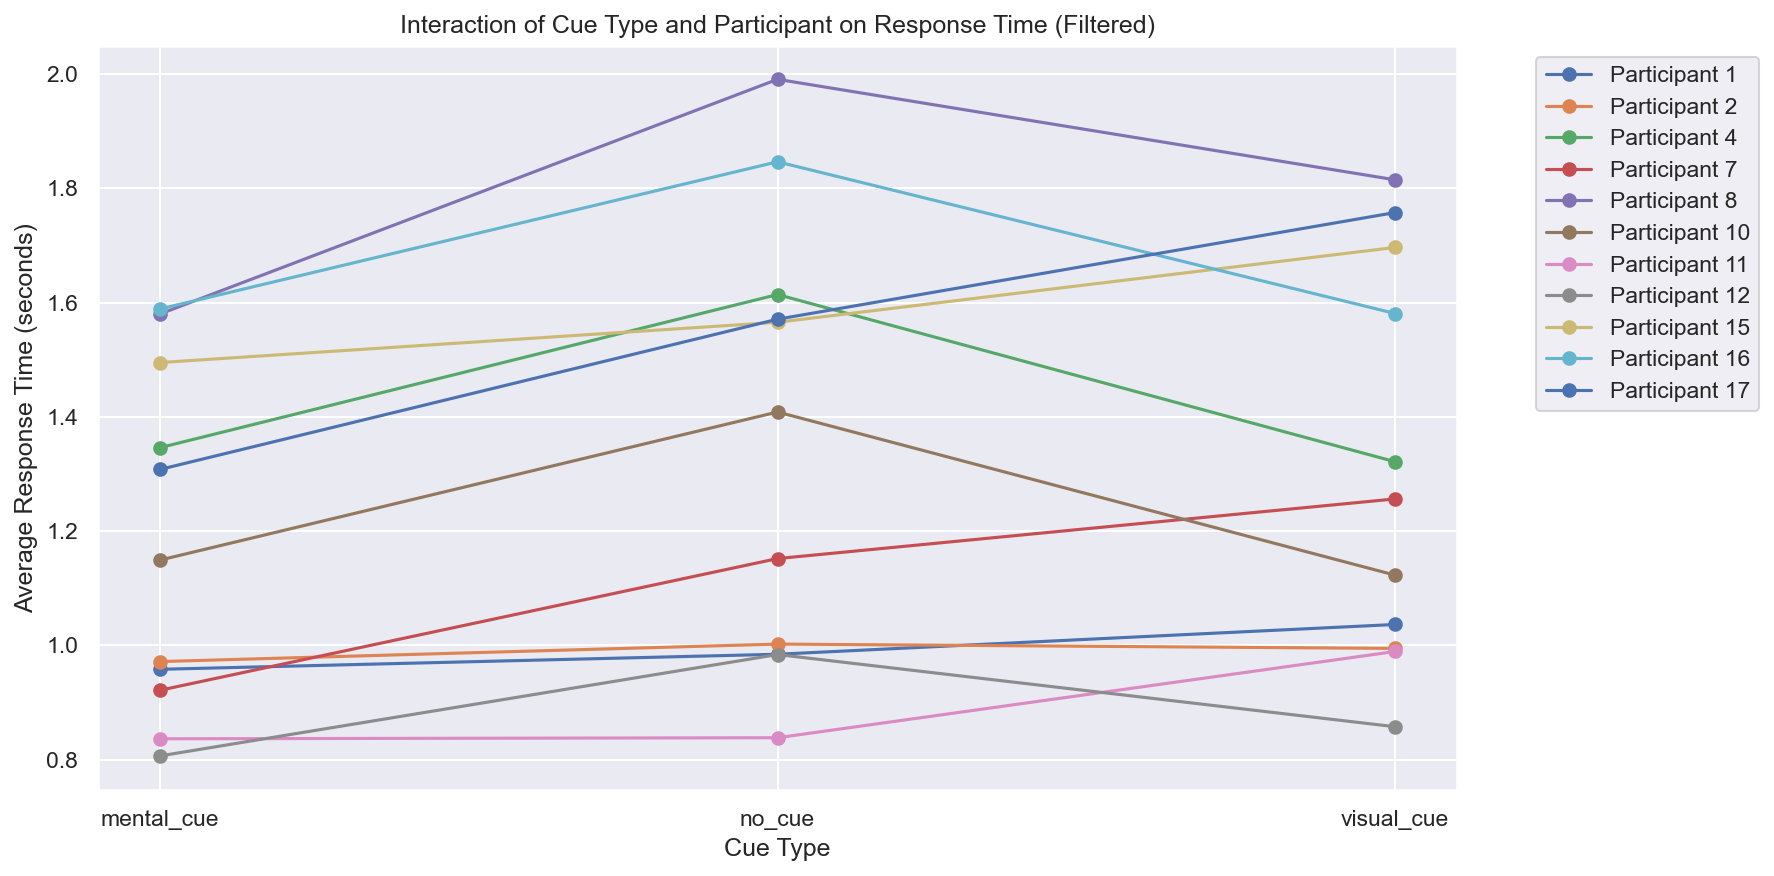

In [43]:
# pivot the table for easier comparison
pivot_mean_rt = mean_rt.pivot(index='participant_id',
                              columns='cue_type', 
                              values='response_time')

# filter participants where mean response time for 'no_cue' is greater than 'mental_cue'
filtered_participants = pivot_mean_rt[pivot_mean_rt['no_cue'] > pivot_mean_rt['mental_cue']].index

# plotting
plt.figure(figsize=(12, 6), dpi=150)
for participant_id in filtered_participants:
    subset = mean_rt[mean_rt['participant_id'] == participant_id]
    plt.plot(subset['cue_type'], subset['response_time'], 
             marker='o', label=f'Participant {participant_id}')

plt.xlabel('Cue Type')
plt.ylabel('Average Response Time (seconds)')
plt.title('Interaction of Cue Type and Participant on Response Time (Filtered)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


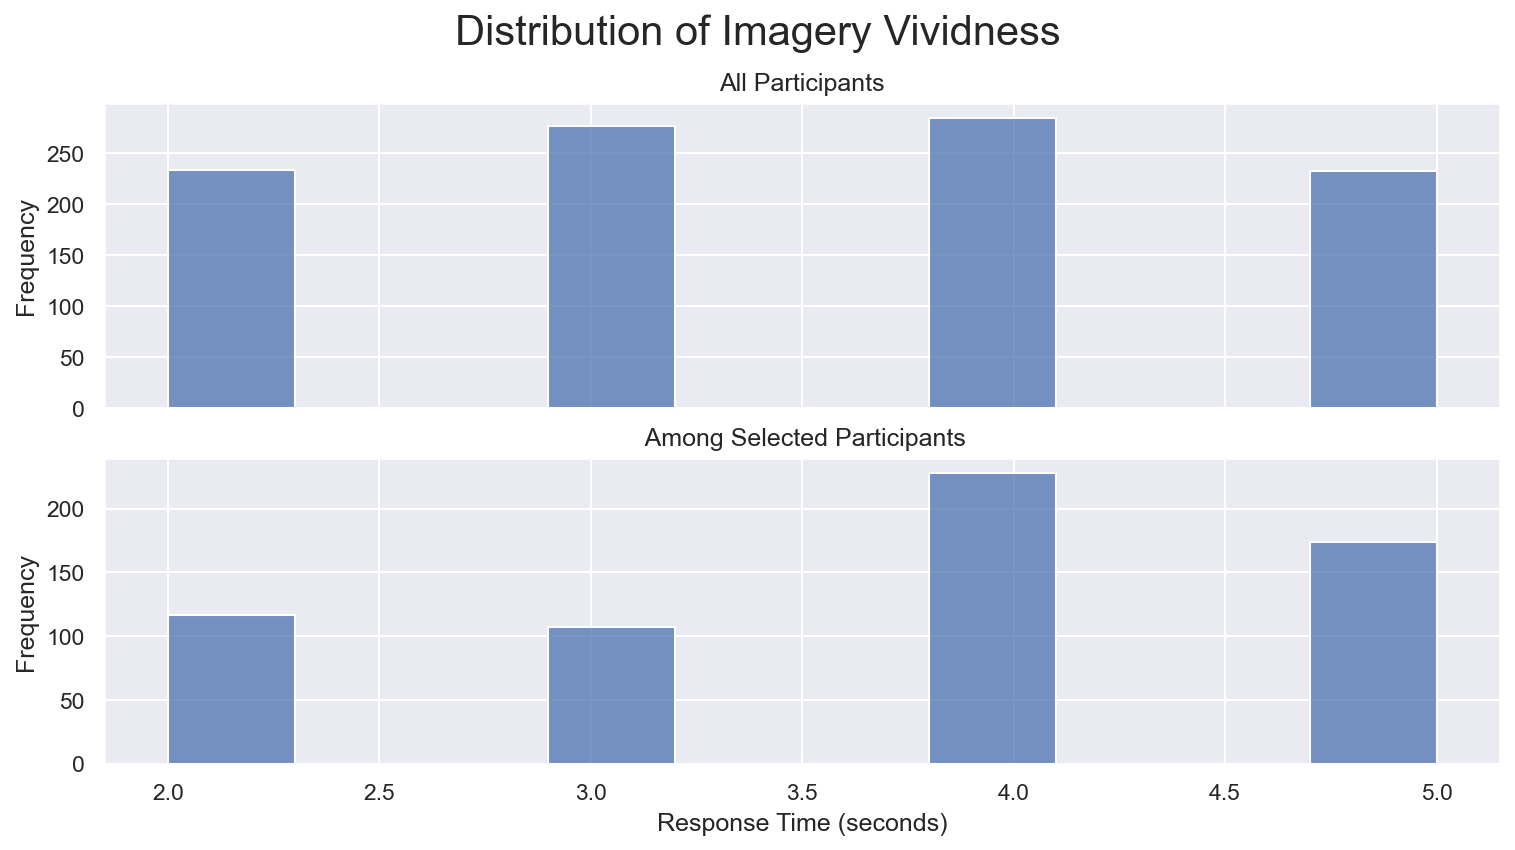

In [44]:
# filter the original DataFrame for only the filtered participants
df_filtered_vividness = df_no_outliner[df_no_outliner['participant_id'].isin(filtered_participants)]

# plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 6), dpi=150,
                        sharex=True)
fig.subplots_adjust(hspace=.5)

for idx, df in enumerate([df_no_outliner, df_filtered_vividness]):
    ax = plt.subplot(2, 1, idx + 1)

    sns.histplot(df['Image_vividness'], bins=10)
    axs[idx].set_ylabel('Frequency')
    axs[idx].set_title(' Among Selected Participants' if idx==1 else 'All Participants')

# set the xlabel for the lower subplot
axs[1].set_xlabel('Imagery Vividness')

fig.suptitle('Distribution of Imagery Vividness',
                x=.5, y=.95, fontsize=20)
plt.xlabel('Response Time (seconds)')
fig.tight_layout(pad=.3, rect=[0, .03, 1, .945])
plt.show()

## the Friedman test

In [45]:
# extract cue types
cue_types = df_combined['cue_type'].unique()

# grouping the data by participant
grouped = df_combined.groupby('participant_id')

# lists to hold response times for each cue type
rt_by_cue = {cue: [] for cue in cue_types}

# filling the lists with response times for each participant
for participant_id, group in grouped:
    for cue in cue_types:
        avg_rt = group[group['cue_type'] == cue]['response_time'].mean()
        rt_by_cue[cue].append(avg_rt)

# performing the Friedman test
result = friedmanchisquare(*rt_by_cue.values())
result

FriedmanchisquareResult(statistic=0.7777777777777715, pvalue=0.6778095780054525)

In [46]:
# extract cue types
cue_types = df_no_outliner['cue_type'].unique()

# grouping the data by participant
grouped = df_no_outliner.groupby('participant_id')

# lists to hold response times for each cue type
rt_by_cue = {cue: [] for cue in cue_types}

# filling the lists with response times for each participant
for participant_id, group in grouped:
    for cue in cue_types:
        avg_rt = group[group['cue_type'] == cue]['response_time'].mean()
        rt_by_cue[cue].append(avg_rt)

# performing the Friedman test
result = friedmanchisquare(*rt_by_cue.values())
result

FriedmanchisquareResult(statistic=1.0, pvalue=0.6065306597126334)